In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\aacjp\OneDrive\Desktop\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Filling in NAN values

In [2]:
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Modifying rennovation and basement features
yrs_ago will represent how many years ago the home was last renovated. If the home hasn't been rennovated this will be how many years ago the home was built. The basement variable will be converted to a 1 or zero because not all homes have a basemtnt.

In [3]:
last_built = []
dates = []
csf = []
for i in range(len(df)):
    if df['yr_built'][i] > df['yr_renovated'][i]:
        last_built.append(int(2020 - df['yr_built'][i]))
    else:
        last_built.append(int(2020 - df['yr_renovated'][i]))
    dates.append(int(df['date'][i][-4:]))
    if df['sqft_basement'][i] == '?':
        floaty = 0.0
    else:
        floaty = float(df['sqft_basement'][i])
    csf.append(df['sqft_living'][i] + floaty)

In [4]:
bsmt = []
counter = 0
cntr2 = 0
cntr = 0
for i in range(len(df)):
    if len(df['sqft_basement'][i]) > 3:
        bsmt.append(1)
    else:
        bsmt.append(0)

In [5]:
df['yrs_ago'] = last_built
df['yr_sold'] = dates
df['combined_sf'] = csf
df['has_basement'] = bsmt
df2 = df.drop(['date', 'id', 'yr_renovated', 'sqft_basement', 'view'], axis='columns')

# Checking for multicolinearity

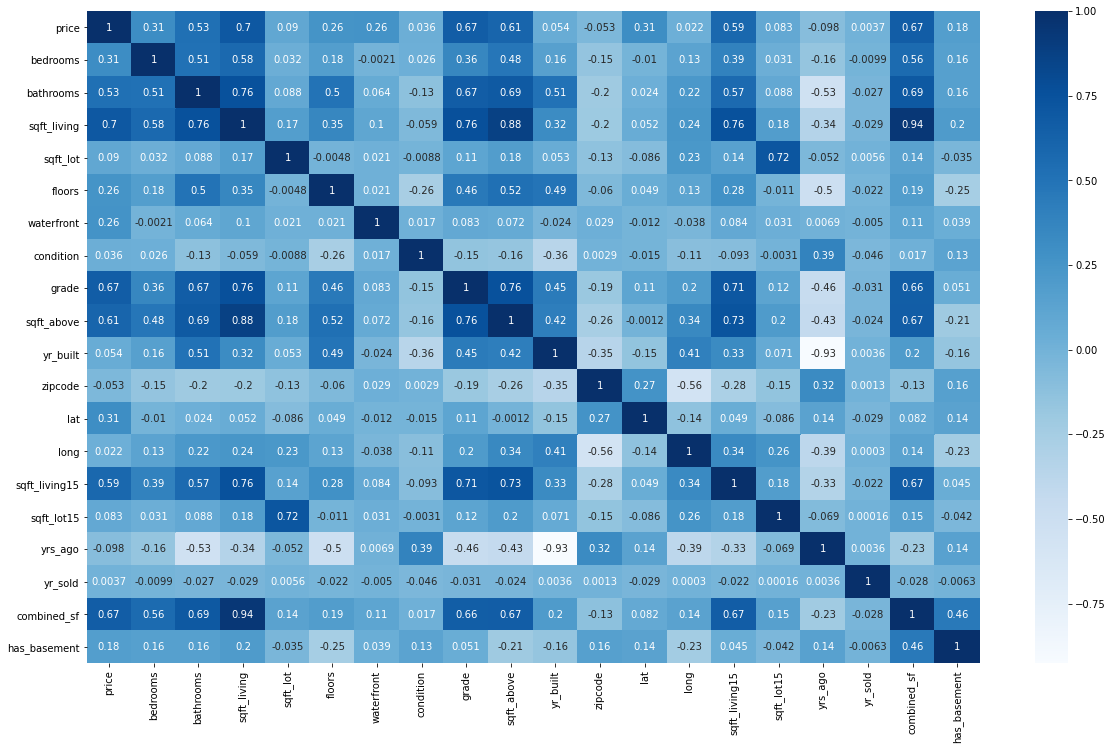

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(20,12))
sns.heatmap(df2.corr(), annot=True, cmap='Blues');

# Modifying lattitude, longitude, and year built to give it more signifigance
I'll represent lattitude and longitude by the decimal points after the whole numbber (ie. 0.276 rather than 47.276). I will also convert year built to years ago it was built, using year built houses are at most 5% apart and if this variable is important we're unlikley to find out.

In [12]:
sla = []
slo = []
syb = []
for i in range(len(df)):
    sla.append(df2['lat'][i] - 47)
    slo.append(df2['long'][i] + 122)
    syb.append(2020 - df2['yr_built'][i])
    
df2['lat'] = sla
df2['long'] = slo
df2['yr_built'] = syb

1. bathrooms and sqft_living
2. bathrooms and combined_sf
3. bathrooms and grade
4. bathrooms and sqft_above
5. grade and sqft_living
6. sqft_above and sqft_living
7. sqft_lot and sqft_lot15

dropping: all things sf except for lot because of multicolinearity

# Dropping multicolinear features

In [13]:
df3 = df2.drop(['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'combined_sf'], axis='columns')

In [15]:
df3.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,yrs_ago,yr_sold,has_basement
0,221900.0,3,1.00,5650,1.0,0.0,3,7,65,98178,0.5112,-0.257,65,2014,0
1,538000.0,3,2.25,7242,2.0,0.0,3,7,69,98125,0.7210,-0.319,29,2014,1
2,180000.0,2,1.00,10000,1.0,0.0,3,6,87,98028,0.7379,-0.233,87,2015,0
3,604000.0,4,3.00,5000,1.0,0.0,5,7,55,98136,0.5208,-0.393,55,2014,1
4,510000.0,3,2.00,8080,1.0,0.0,3,8,33,98074,0.6168,-0.045,33,2015,0


# 1. How does bathroom to bedroom ratio affect price?

Conclusion: According to the Linear Regression model house price is expected to increase by 488537
for every bathroom there is for each bedroom. what this means is that, based only on this metric, a house with 2 beds and 4 baths would be 1204752 because 488537 x 2 + 227679 (y-intercept) = 1204752

Reccomendation/Insight: houses with more bathrooms than bedrooms cost significantly more than houses with as many or fewer bathrooms than bedrooms.

In [16]:
b2b_ratio = []
for i in range(len(df3)):
    b2b_ratio.append(round(df3['bathrooms'][i] / df3['bedrooms'][i] , 2))
    
df3['b2b_ratio'] = b2b_ratio    
X = pd.DataFrame(b2b_ratio)
y = df3['price']

Text(0.5, 1.0, 'bedroom to bathroom ratio and house price')

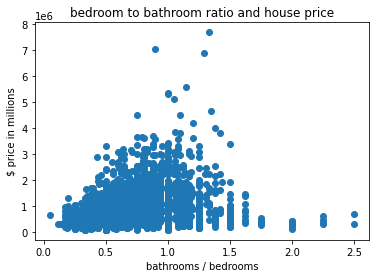

In [17]:
from matplotlib import pyplot as plt
plt.scatter(X, y)
plt.xlabel('bathrooms / bedrooms')
plt.ylabel('$ price in millions')
plt.title('bedroom to bathroom ratio and house price')

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
round(model.coef_[0])

488537

In [19]:
np.round(model.predict([[2]]))

array([1204752.])

In [20]:
round(model.intercept_)

227679

# 2. What effect does housing condition have on sale price, how does this compare to houses with a waterfront view?

conclusion: a higher condition index leads to higher prices, seeing the biggest jump from 2/5 to 3/5. however fro houses with waterfront the correlation is mostly negative with the exception of the increase from 1 to 2.

reccomendation: taking the effort to improve the quality of your home is generally worth the effort, especially if your house is currently a 2 or 4. If at all possible you should find out what it's condition is if you want to sell your home at the highest price. But be careful, because the cost of improving the quality may exceed the gains on the sale. Odly enough the findings are quite different for homes with waterfront, however 'fixer upper' homes on the waterfront may be a good investment opportunity.

In [21]:
waterfront_properties = df3.loc[df3['waterfront'] == 1.0]

In [22]:
ix_arr = np.unique(df3['condition'])
avg_prices = {}
avg_prices_waterfront = {}
for i in range(len(ix_arr)):
    avg_prices[ix_arr[i]] = np.mean(df3.loc[df3['condition'] == ix_arr[i]]['price'])
    avg_prices_waterfront[ix_arr[i]] = np.mean(waterfront_properties.loc[waterfront_properties['condition'] == ix_arr[i]]['price'])
    
print(f'All homes: {avg_prices}')
print(f'Homes with waterfront: {avg_prices_waterfront}')

All homes: {1: 341067.2413793103, 2: 328178.7588235294, 3: 542173.0573466476, 4: 521374.450413951, 5: 612577.7425044092}
Homes with waterfront: {1: 658000.0, 2: 2560000.0, 3: 1802661.875, 4: 1579260.8695652173, 5: 1702022.2222222222}


Text(0, 0.5, 'Average Price in hundreds of thousands')

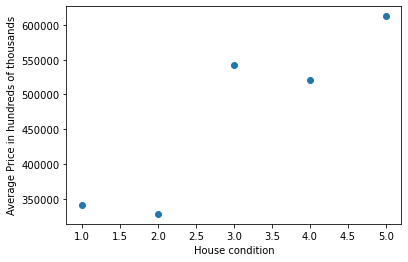

In [23]:
y = list(avg_prices.values())
x = list(avg_prices.keys())
plt.scatter(x, y)
plt.xlabel('House condition')
plt.ylabel('Average Price in hundreds of thousands')

Text(0, 0.5, 'Average Price in millions')

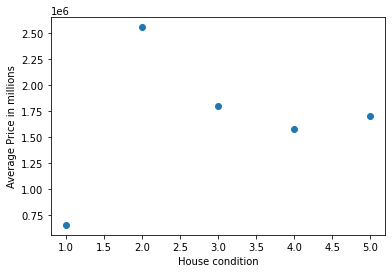

In [24]:
y = list(avg_prices_waterfront.values())
x = list(avg_prices_waterfront.keys())
plt.scatter(x, y)
plt.xlabel('House condition')
plt.ylabel('Average Price in millions')

# 3. In which zip code are houses the oldest on average and what is the average price? What about the newest?

conclusion: the 98105 zipcode which consists mainly of the Lauel Hurst neigborhood near the University of Washington is the 
oldest with the average house being built in 1940. In contrast, the 98053 zipcode in the eastern part of Richmond, WAis the newest with the average house being built in 1998. The average house in 98105 is 863229 and the average house in 98053 is slightly cheaper at $677215. In general, houses that are further east or inland are newer on average, however price is not much different.

reccomendations: If you are looking to save, it is best to avoid homes built before 1960 and historic neighborhoods. Homes further inland are also cheaper on average, if you like being closer to mountains this is could work out well for you.

In [25]:
ziparr = np.unique(df3['zipcode'])
avg_yr = {}
pbz = []
for i in range(len(ziparr)):
    pbz.append(np.mean(df3.loc[df['zipcode'] == ziparr[i]]['price']))
    avg_yr[round(np.mean(df3.loc[df['zipcode'] == ziparr[i]]['yr_built']))] = ziparr[i]

In [26]:
avg_yr[max(avg_yr.keys())], max(avg_yr.keys())

(98105, 80)

In [27]:
avg_yr[min(avg_yr.keys())], min(avg_yr.keys())

(98053, 22)

In [28]:
round(np.mean(df3.loc[df3['zipcode'] == 98105]['price']))

863229

In [29]:
round(np.mean(df3.loc[df3['zipcode'] == 98053]['price']))

677215

# Finding average price, house age, and longitude by zip code

In [31]:
pbz = []
ybz = []
lobz = []
for i in range(len(avg_yr)):
    pbz.append(np.mean(df3.loc[df3['zipcode'] == list(avg_yr.values())[i]]['price']))
    ybz.append(list(avg_yr.keys())[i])
    lobz.append(np.mean(df3.loc[df3['zipcode'] == list(avg_yr.values())[i]]['long']))

Text(0, 0.5, 'Average Price in millions by zip code')

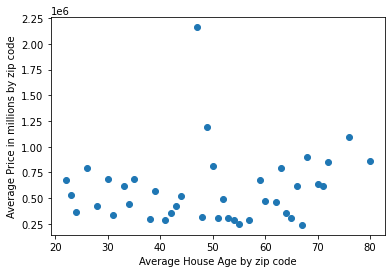

In [32]:
plt.scatter(ybz, pbz)
plt.xlabel('Average House Age by zip code')
plt.ylabel('Average Price in millions by zip code')

Text(0, 0.5, 'Average Price in millions by zip code')

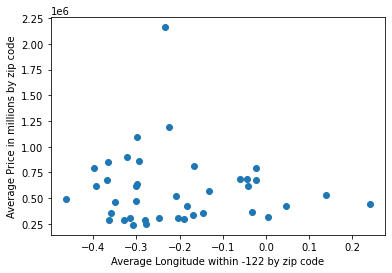

In [34]:
plt.scatter(lobz, pbz)
plt.xlabel('Average Longitude within -122 by zip code')
plt.ylabel('Average Price in millions by zip code')

# 4. How much is the average house over 1 acre and how many beds&baths does it have on average, how does this compare to the dataset as a whole?

Conclucion: The average house is $540,297 , has 3 beds and 2 baths, and is roughly 1/3 of an acre. The average house over 1 acre is also a 3 bed 2 bath but costs about 23.7 percent more on average. The average house over 2 acres is 675k which is only 
24.9 percent more than the 1/3 acre home

Reccomendation: if a big yard is important to you it is well worth the investment to buy a house on a 2  - 2.5 acre yard, provided you can afford it, as you can get 6 to 8 times as much property for only 25% more!

In [35]:
got_acres = df3.loc[df3['sqft_lot'] >= 43560]
print(f"The average house over 1 acre is ${round(np.mean(got_acres['price']))}")
print(f"The average house over 1 acre has {round(np.mean(got_acres['bedrooms']))} bedrooms and {round(np.mean(got_acres['bathrooms']))} bathrooms")

The average house over 1 acre is $668358
The average house over 1 acre has 3 bedrooms and 2 bathrooms


In [36]:
print(f"The average house is ${round(np.mean(df3['price']))}")
print(f"The average house has {round(np.mean(df3['bedrooms']))} bedrooms and {round(np.mean(df3['bathrooms']))} bathrooms")

The average house is $540297
The average house has 3 bedrooms and 2 bathrooms


In [40]:
print(f"The average house is {np.mean(df3['sqft_lot']) / 43560} acres")

The average house is 0.3466347282019282 acres


In [46]:
print(f"The average house over 2 acres is ${np.mean(df3.loc[df3['sqft_lot'] >= 43560*2]['price'])}")

The average house over 2 acres is $675002.0620300752


In [54]:
print(f"The average house over 1 acre costs {100*(round(np.mean(got_acres['price'])) / round(np.mean(df3['price']))-1)}% more than average.")

The average house over 1 acre costs 23.701963919844093% more than average.


In [55]:
print(f"The average house over 2 acres costs {100*(675002 / round(np.mean(df3['price']))-1)}% more than average.")

The average house over 2 acres costs 24.93165795849319% more than average.


Lattitude and Longitude are being used as location variable rather than zip code, b2b_ratio and yrs_ago have multicolinearity, and yr_sold has such little variance that it's not worth using. Although I didn't month sold could be created as a variable and used instead of year sold.

In [56]:
df4 = df3.drop(['zipcode', 'b2b_ratio', 'yr_sold', 'yrs_ago'], axis='columns')
df4.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long,has_basement
0,221900.0,3,1.00,5650,1.0,0.0,3,7,65,0.5112,-0.257,0
1,538000.0,3,2.25,7242,2.0,0.0,3,7,69,0.7210,-0.319,1
2,180000.0,2,1.00,10000,1.0,0.0,3,6,87,0.7379,-0.233,0
3,604000.0,4,3.00,5000,1.0,0.0,5,7,55,0.5208,-0.393,1
4,510000.0,3,2.00,8080,1.0,0.0,3,8,33,0.6168,-0.045,0


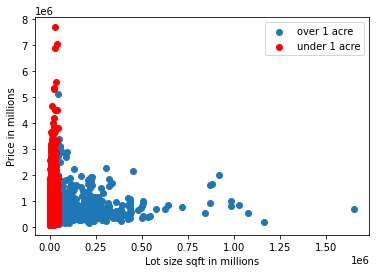

In [57]:
subset = df3.loc[df3['sqft_lot'] >= 43560]['sqft_lot']
subset_y = df3.loc[df3['sqft_lot'] >= 43560]['price']
under_1 = df3.loc[df3['sqft_lot'] <= 43560]['sqft_lot']
under1_y = df3.loc[df3['sqft_lot'] <= 43560]['price']
plt.scatter(subset, subset_y, label='over 1 acre')
plt.scatter(under_1, under1_y, color='red', label='under 1 acre')
plt.xlabel('Lot size sqft in millions')
plt.ylabel('Price in millions')
plt.legend()

# Creating a train/test split and implementing Kfold cross-validation

In [58]:
from sklearn.model_selection import KFold, train_test_split
kf = KFold(n_splits=10, shuffle=True)
X = df4.drop(['price'], axis='columns')
y = df4['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
def results(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test), model.predict(X_test), y_test

In [60]:
scores = []
predictions = []
actual = []

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    scores.append(results(model, X_train, X_test, y_train, y_test)[0])
    predictions.append(results(model, X_train, X_test, y_train, y_test)[1])
    actual.append(results(model, X_train, X_test, y_train, y_test)[2])

In [61]:
scores

[0.6419182190384511,
 0.658961153840478,
 0.5833158861041106,
 0.6444217694966856,
 0.600096204483341,
 0.629986695953513,
 0.6215745375809156,
 0.6342455489978236,
 0.6739938904851641,
 0.6566360929319288]

In [62]:
best = 0
for i in range(len(scores)):
    if scores[i] == max(scores):
        best += i

In [63]:
yhat = list(predictions[best])

In [64]:
yreal = list(actual[best])

In [65]:
numer = 0
denom = 0
for i in range(len(yreal)):
    numer += (yreal[0] - yhat[0])**2
    denom += (yreal[0] - np.mean(yreal))**2
    
R2 = 1 - numer/denom

In [66]:
vif = 1/(1-R2)
vif

0.00971783282950777

In [67]:
df4

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long,has_basement
0,221900.0,3,1.00,5650,1.0,0.0,3,7,65,0.5112,-0.257,0
1,538000.0,3,2.25,7242,2.0,0.0,3,7,69,0.7210,-0.319,1
2,180000.0,2,1.00,10000,1.0,0.0,3,6,87,0.7379,-0.233,0
3,604000.0,4,3.00,5000,1.0,0.0,5,7,55,0.5208,-0.393,1
4,510000.0,3,2.00,8080,1.0,0.0,3,8,33,0.6168,-0.045,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,3,8,11,0.6993,-0.346,0
21593,400000.0,4,2.50,5813,2.0,0.0,3,8,6,0.5107,-0.362,0
21594,402101.0,2,0.75,1350,2.0,0.0,3,7,11,0.5944,-0.299,0
21595,400000.0,3,2.50,2388,2.0,0.0,3,8,16,0.5345,-0.069,0


In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# The vif score is very low, this is great but the results I've gotten with this dataset are a bit spuratic.  

I will use mean normalization as it is better practice and has given me a constant score in the 2.9's and 3.0's

For each column I will divide each column by it's average, This will help keep all variables on a similar scale.

In [69]:
means = []
for i in range(len(X.columns)):
    means.append(np.mean(X[X.columns[i]]))

In [70]:
scaled_bd = []
scaled_ba = []
scaled_lot = []
scaled_floors = []
scaled_cond = []
scaled_grade = []
scaled_year = []
for i in range(len(X)):
    scaled_bd.append(X['bedrooms'][i] / means[0])
    scaled_ba.append(X['bathrooms'][i] / means[1])
    scaled_lot.append(X['sqft_lot'][i] / means[2])
    scaled_floors.append(X['floors'][i] / means[3])
    scaled_cond.append(X['condition'][i] / means[5])
    scaled_grade.append(X['grade'][i] / means[6])
    scaled_year.append(X['yr_built'][i] / means[7])

In [71]:
df4['bedrooms'] = scaled_bd
df4['bathrooms'] = scaled_ba
df4['sqft_lot'] = scaled_lot
df4['floors'] = scaled_floors
df4['condition'] = scaled_cond
df4['grade'] = scaled_grade
df4['yr_built'] = scaled_year
df4.to_csv('KC_Normalized.csv')

In [72]:
scores = []
predictions = []
actual = []

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    scores.append(results(model, X_train, X_test, y_train, y_test)[0])
    predictions.append(results(model, X_train, X_test, y_train, y_test)[1])
    actual.append(results(model, X_train, X_test, y_train, y_test)[2])

In [73]:
scores

[0.6116665231404176,
 0.6265240287716803,
 0.6587415397668894,
 0.6233948765667341,
 0.6304795539639729,
 0.6484134669552657,
 0.6111188202563188,
 0.6643122078850853,
 0.6203960202925896,
 0.6360380855066448]

In [76]:
#selecting the highest scoring model
best = 0
for i in range(len(scores)):
    if scores[i] == max(scores):
        best += i

In [77]:
yhat = list(predictions[best])
yreal = list(actual[best])

# Validating R squared score 

In [81]:
numer = 0
denom = 0
for i in range(len(yreal)):
    numer += (yreal[i] - yhat[i])**2
    denom += (yreal[i] - np.mean(yhat))**2
    
R2 = 1 - numer/denom
R2

0.6643484731762536

# Calculating Vif score

In [82]:
vif = 1 / (1 - R2)
vif

2.979280355024599

In [83]:
yhat[1555], yreal[1555],

(494514.76730924426, 449000.0)

# The Vif score has improved and is now ~3.01

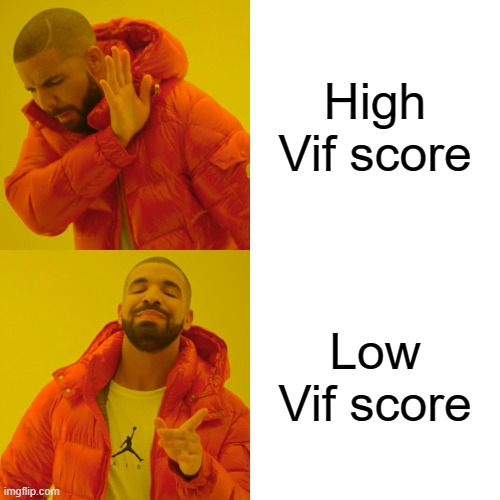

In [84]:
from IPython.display import Image
Image(r"C:\Users\aacjp\Downloads\4hdlp2.jpg")

Although more like inconsistent Vif score vs consistent Vif score in this case!

# Switching over to Statsmodels to further analyze the model

In [85]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [86]:
data = df4.to_csv(r'C:\Users\aacjp\KC_Normalized.csv', index=False)

In [87]:
import pandas as pd
data = pd.read_csv(r'C:\Users\aacjp\KC_Normalized.csv')

In [88]:
f = 'price~bedrooms+bathrooms+sqft_lot+floors+waterfront+condition+grade+yr_built+lat+long+has_basement'

In [89]:
# calling it predictor so that sklearn model can be used without restarting the model
predictor = ols(formula=f, data=data).fit()

In [90]:
predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     3395.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):               0.00
Time:                        06:55:44   Log-Likelihood:            -2.9655e+05
No. Observations:               21597   AIC:                         5.931e+05
Df Residuals:                   21585   BIC:                         5.932e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.711e+06    1.6e+04   -107.048      0.000   -1.74e+06   -1.68e+06
bedrooms      9257.8607   6575.870      1.408      0.159   -3631.330    2.21e+04
bathrooms     2.666e+05   6978.658     38.198      0.000    2.53e+05     2.8e+05
sqft_lot      3768.6154    573.897      6.567      0.000    2643.735    4893.496
floors        1129.5010   5646.422      0.200      0.841   -9937.904    1.22e+04
waterfront    8.617e+05   1.86e+04     46.214      0.000    8.25e+05    8.98e+05
condition     9.185e+04   8653.498     10.614      0.000    7.49e+04    1.09e+05
grade         1.402e+06   1.39e+04    100.884      0.000    1.37e+06    1.43e+06
yr_built      1.784e+05   3603.325     49.505      0.000    1.71e+05    1.85e+05
lat           5.135e+05   1.15e+04     44.550      0.000    4.91e+05    5.36e+05
long           757.9367   1.26e+04      0.060      0.952   -2.39e+04    2.55e+04
has_basement  1.415e+04   3630.153      3.897      0.000    7033.077    2.13e+04
==============================================================================
Omnibus:                    20336.165   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2683705.420
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      56.976   Cond. No.                         43.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Normality check

In [91]:
import statsmodels.api as sm
import scipy.stats as stats

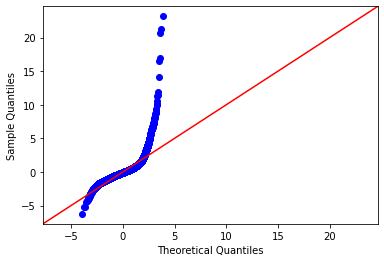

In [92]:
fig = sm.graphics.qqplot(predictor.resid, dist=stats.norm, line='45', fit=True)

# Homoscedasticity check

In [93]:
x_cols = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'lat', 'long', 'has_basement']

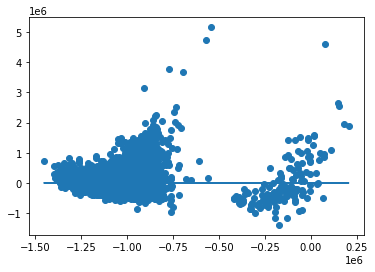

In [94]:
plt.scatter(model.predict(data[x_cols]), predictor.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))])

# I will remove outliers and use month sold as a variable. The code will be in the other notebooks